In [8]:
import numpy
import random
import json
import gzip
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot
import math 
import matplotlib.cm as cm
import sklearn

In [2]:
def readGz(f):
  for l in gzip.open(f):
    yield eval(l)

In [3]:
places_file = "places.clean.json.gz"
places = []

print "Reading places file..."
for p in readGz(places_file):
    gps = p['gps']
    
    # Check whether gps location is none
    if gps != None:
        ns = gps[0]
        ew = gps[1]
        if ns > 32.6 and ns < 32.9 and ew > -117.3 and ew < -116.9:
            places.append(p)
print "Done"

Reading places file...
Done


In [4]:
print places[0]


{'hours': None, 'phone': u'(619) 477-5753', 'name': u'Trophy Lounge', 'closed': False, 'address': [u'999 National City Blvd', u'National City, CA 91950'], 'price': None, 'gPlusPlaceId': '105478047807613773348', 'gps': [32.674394, -117.105986]}


In [5]:
# Get the gps coordinates to use for k-means clustering
coordinates = numpy.zeros([1,2])
# Draw x and y 
for p in places:
    coordinates = numpy.append(coordinates, numpy.asarray([p['gps'][0], p['gps'][1]]).reshape(1,2), axis = 0)
    
coordinates = coordinates[1:]

In [6]:
def least_squares(labels, centers):
    error = 0
    for l, coor in zip(labels, coordinates):
        error += math.sqrt(sum ((coor - centers[l])**2))
        
    return error * 1.0 / len(labels)

In [9]:
# Iterate over to find optimal number of clusters for K Means
i = 0
least_square_errors = []
for itr in range(50):
    i += 1
    kmeans = sklearn.cluster.KMeans(n_clusters = int(i)).fit(coordinates)
    print "The Least Squared Error with ", itr, "clusters:", least_squares(kmeans.labels_, kmeans.cluster_centers_)
    least_square_errors.append(least_squares(kmeans.labels_, kmeans.cluster_centers_))
    

The Least Squared Error with  0 clusters: 0.0960406317684
The Least Squared Error with  1 clusters: 0.0720306230698
The Least Squared Error with  2 clusters: 0.0575181550187
The Least Squared Error with  3 clusters: 0.0476546640455
The Least Squared Error with  4 clusters: 0.0420004267556
The Least Squared Error with  5 clusters: 0.0372039196243
The Least Squared Error with  6 clusters: 0.0338808890525
The Least Squared Error with  7 clusters: 0.0305977293461
The Least Squared Error with  8 clusters: 0.0287871039408
The Least Squared Error with  9 clusters: 0.0262114130948
The Least Squared Error with  10 clusters: 0.0247385360286
The Least Squared Error with  11 clusters: 0.02356863333
The Least Squared Error with  12 clusters: 0.0224288887856
The Least Squared Error with  13 clusters: 0.0216512106033
The Least Squared Error with  14 clusters: 0.0206378694105
The Least Squared Error with  15 clusters: 0.0196104058114
The Least Squared Error with  16 clusters: 0.0190552243448
The Least

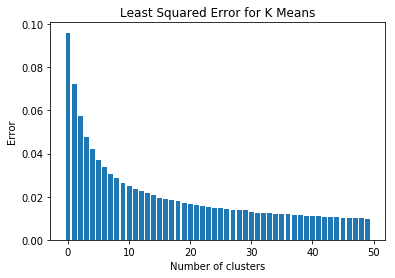

In [47]:
# Find elbow in curve
matplotlib.pyplot.bar([i for i in range(50)], least_square_errors, width=0.8, bottom=None, align='center', data=None)
plt.title( "Least Squared Error for K Means")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.savefig('elbow_curve.png', dpi=300, bbox_inches='tight')

In [38]:
# Use K-Means with 15 clusters
kmeans_15 = sklearn.cluster.KMeans(n_clusters = 15).fit(coordinates)
centers = kmeans_15.cluster_centers_
labels = kmeans_15.labels_

# Contain pgs Location of Businesses
group_cluster_coordinates = {}

# Contains JSON object of Business
groups = {} 

# Group Dataset
for i, p in enumerate(places):
    coor = numpy.asarray([p['gps'][0], p['gps'][1]]).reshape(1, 2)
    if labels[i] in groups:
        groups[labels[i]] = groups[labels[i]] + [p]
        group_cluster_coordinates[labels[i]] = numpy.append(group_cluster_coordinates[labels[i]], coor, axis = 0)
    else:
        groups[labels[i]] = [p]
        group_cluster_coordinates[labels[i]] = coor

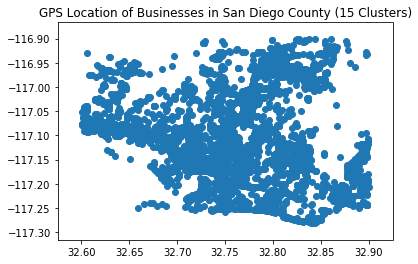

In [39]:
# Show result of K CLusters 
matplotlib.pyplot.scatter(coordinates[:,0], coordinates[:,1])
plt.title("GPS Location of Businesses in San Diego County (15 Clusters)")
plt.savefig('business_locations.png', dpi=300, bbox_inches='tight')

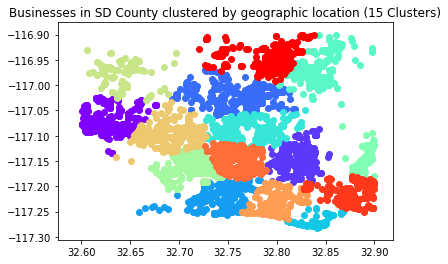

In [41]:
colors = cm.rainbow(numpy.linspace(0, 1, len(group_cluster_coordinates)))
for i, c in enumerate(colors):
    plt.scatter(group_cluster_coordinates[i][:,0], group_cluster_coordinates[i][:,1],color=c)
plt.title("Businesses in SD County clustered by geographic location (15 Clusters)")
plt.savefig('cluster_15.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
# Use K-Means with 26 clusters
kmeans_26 = sklearn.cluster.KMeans(n_clusters = 26).fit(coordinates)
centers = kmeans_26.cluster_centers_
labels = kmeans_26.labels_

# Contain pgs Location of Businesses
group_cluster_coordinates = {}

# Contains JSON object of Business
groups = {} 

# Group Dataset
for i, p in enumerate(places):
    coor = numpy.asarray([p['gps'][0], p['gps'][1]]).reshape(1, 2)
    if labels[i] in groups:
        groups[labels[i]] = groups[labels[i]] + [p]
        group_cluster_coordinates[labels[i]] = numpy.append(group_cluster_coordinates[labels[i]], coor, axis = 0)
    else:
        groups[labels[i]] = [p]
        group_cluster_coordinates[labels[i]] = coor

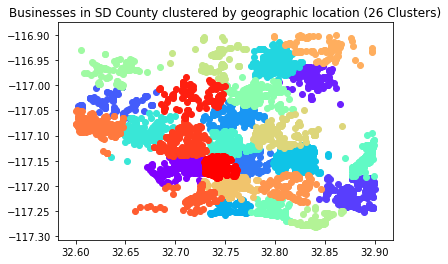

In [44]:
colors = cm.rainbow(numpy.linspace(0, 1, len(group_cluster_coordinates)))
for i, c in enumerate(colors):
    plt.scatter(group_cluster_coordinates[i][:,0], group_cluster_coordinates[i][:,1],color=c)
plt.title("Businesses in SD County clustered by geographic location (26 Clusters)")
plt.savefig('cluster_26.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# Use K-Means with 100 clusters
kmeans_100 = sklearn.cluster.KMeans(n_clusters = 100).fit(coordinates)
centers = kmeans_100.cluster_centers_
labels = kmeans_100.labels_

# Contain pgs Location of Businesses
group_cluster_coordinates = {}

# Contains JSON object of Business
groups = {} 

# Group Dataset
for i, p in enumerate(places):
    coor = numpy.asarray([p['gps'][0], p['gps'][1]]).reshape(1, 2)
    if labels[i] in groups:
        groups[labels[i]] = groups[labels[i]] + [p]
        group_cluster_coordinates[labels[i]] = numpy.append(group_cluster_coordinates[labels[i]], coor, axis = 0)
    else:
        groups[labels[i]] = [p]
        group_cluster_coordinates[labels[i]] = coor

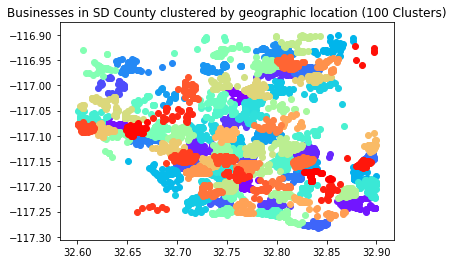

In [46]:
colors = cm.rainbow(numpy.linspace(0, 1, len(group_cluster_coordinates)))
for i, c in enumerate(colors):
    plt.scatter(group_cluster_coordinates[i][:,0], group_cluster_coordinates[i][:,1],color=c)
plt.title("Businesses in SD County clustered by geographic location (100 Clusters)")

plt.savefig('cluster_100.png', dpi=300, bbox_inches='tight')
plt.show()

How San Diego County looks like:


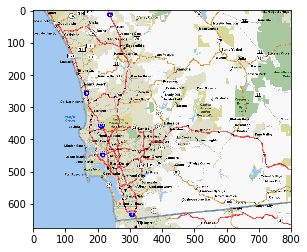

In [18]:
# Display map of SD County
print "How San Diego County looks like:"
import matplotlib.image as mpimg
img=mpimg.imread('fmap.png')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
# The dataset containing businesses does not contain the category of the business, so we have to load in the reviews

In [19]:
place_ids = [p['gPlusPlaceId'] for p in places]

In [23]:
reviews_file = "reviews.clean.json.gz"
reviews = []

print "Reading reviews file..."
for p in readGz(reviews_file):
    if p['gPlusPlaceId'] in place_ids:
        reviews.append(p)
print "Done"

Reading reviews file...
Done


In [48]:
print reviews[2]

{'rating': 5.0, 'reviewerName': u'Michael Reimer', 'gPlusUserId': u'100000643561521516925', 'gPlusPlaceId': u'115131063907606892085', 'reviewText': u'Very clean, authentic, and reasonably priced.  Average meal $7 w/o tip.', 'unixReviewTime': 1395883999, 'categories': [u'Vietnamese Restaurant'], 'reviewTime': u'Mar 26, 2014'}


In [25]:
# Calculate the number of unique categories
all_categories = []

# Iterate over the number of business categories in the review set
for i, r in enumerate(reviews):
    cats = r['categories'] # could be a list of categories
    if cats == None or cats == []: 
        continue
    #print type(cats[2]), cats[2]
    for c in cats:
        if c == None: continue
        if c not in all_categories:
            all_categories = all_categories + [c]

In [26]:
# Map Google Plus IDs with cluster label 
places_to_labels = {}
for i, p in enumerate(places):
    places_to_labels[p['gPlusPlaceId']] = labels[i]

In [27]:
# Map Google Plus ID with categories
placeIds_to_categories = {}
for r in reviews:
    
    businessId = r['gPlusPlaceId']
    if businessId not in place_ids: continue
      
    cats = r['categories']
    if cats == None: continue    
    
    for c in cats:
        if businessId not in placeIds_to_categories:
            placeIds_to_categories[businessId] = [c]
        if c not in placeIds_to_categories[businessId]:
            placeIds_to_categories[businessId] += [c]

In [79]:
# Now I want to create a feature vector for each cluster that counts up the number of times a category pops up
# --> If I use that then I can use Pearson Correlation to predict which cluster a user should check out  
# -->(this would be after I create a vector matrix for that user) So someone new to San Diego can be directed 
# --> to a neighborhood that would best align with their interests

# Create a 100 x (# of categories)
num_categories = len(all_categories)
cluster_cat_fts = numpy.zeros((100, num_categories))

print numpy.shape(cluster_cat_fts)

for i in range(100):
    # For business in cluster
    cluster = groups[i]
    for b in cluster:
        if b['gPlusPlaceId'] not in placeIds_to_categories.keys(): 
            continue
        cat = placeIds_to_categories[b['gPlusPlaceId']]
        #if cat == None: continue
        for c in cat:
            cluster_cat_fts[i, all_categories.index(c)] += 1
# The problem is that none of my business ids in groups is in placeIds_to_categories
           

(100, 1659)


In [86]:
#placeIds_to_categories.keys()
#sum(cluster_cat_fts[0])
#placeIds_to_categories.keys()

In [95]:
# Calculate Pearson Correlation between 2 vectors, pass in userFtVector(userID)
def predict(userId):
    # Calculates category vector for a given user
    user_fts = numpy.zeros(len(all_categories))
    for r in reviews:
        if userId == r['gPlusUserId']:
            if r['categories'] == None: continue
            for c in r['categories']:
                if c in all_categories:
                    user_fts[all_categories.index(c)] += 1
                    
    # Calculate Pearson Correlation Coef for each cluster against the given user
    coef = []
    for i in range(len(cluster_cat_fts)):
        coef.append(scipy.stats.pearsonr(user_fts, numpy.asarray(cluster_cat_fts[i, :])))
        
    return coef.index(max(coef))  

In [102]:
for r in reviews[:20]:
    prediction = predict(r['gPlusUserId'])
    print "User:", r['gPlusUserId'], "        Cluster Prediction:", prediction, "        Cluster Center:", centers[prediction]

User: 100000474627508356351         Cluster Prediction: 83         Cluster Center: [  32.80297722 -117.19657067]
User: 100000488698879506795         Cluster Prediction: 80         Cluster Center: [  32.85094951 -116.96020419]
User: 100000643561521516925         Cluster Prediction: 74         Cluster Center: [  32.75208919 -117.09698432]
User: 100001527118314674594         Cluster Prediction: 52         Cluster Center: [  32.63996445 -117.09985439]
User: 100003629754691623031         Cluster Prediction: 56         Cluster Center: [  32.70377037 -117.09414604]
User: 100004329808098451426         Cluster Prediction: 82         Cluster Center: [  32.79207354 -117.08192822]
User: 100004500301804031148         Cluster Prediction: 70         Cluster Center: [  32.69365462 -117.12582463]
User: 100005108494732453386         Cluster Prediction: 0         Cluster Center: [  32.76574776 -117.02200296]
User: 100005108494732453386         Cluster Prediction: 0         Cluster Center: [  32.76574776 

In [33]:
print centers

[[  32.89013422 -117.14810778]
 [  32.74765765 -117.16284616]
 [  32.74192858 -117.02926135]
 [  32.62674575 -117.08532577]
 [  32.80684748 -117.2558788 ]
 [  32.7941604  -116.93608745]
 [  32.80711497 -117.13758313]
 [  32.6234395  -116.96511003]
 [  32.86797286 -117.22999582]
 [  32.70814111 -117.1418053 ]
 [  32.84219977 -117.0020355 ]
 [  32.75190251 -117.20236054]
 [  32.76038486 -117.11545283]
 [  32.66799853 -117.10443092]
 [  32.79123507 -116.96480818]
 [  32.72260869 -117.22882187]
 [  32.81992689 -117.18049939]
 [  32.76475319 -117.04593981]
 [  32.84309528 -117.27441266]
 [  32.83791549 -116.9840136 ]
 [  32.72497203 -117.16808327]
 [  32.6286936  -117.02615004]
 [  32.80461716 -117.07880495]
 [  32.85878419 -116.92645432]
 [  32.74649883 -117.24832976]
 [  32.8199828  -117.15392675]
 [  32.71416445 -117.09113121]
 [  32.75950098 -117.13624545]
 [  32.80297722 -117.19657067]
 [  32.72185113 -117.12716134]
 [  32.87164125 -117.21196828]
 [  32.80487262 -116.97103303]
 [  32.7

In [24]:
len(reviews)

52392

<type 'list'>


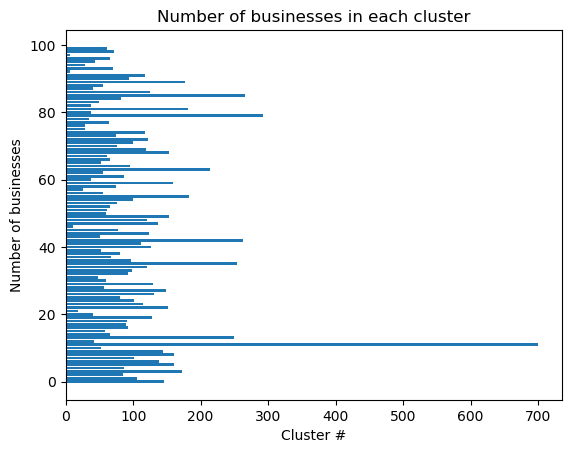

In [72]:
# Number of businesses in each cluster
plt.rcdefaults()
fig, ax = plt.subplots()
print type(groups[0])
xs = [i for i in range(100)]
ys = [len(groups[i]) for i in range(100)]

ax.barh(xs, ys)
ax.set_title('Number of businesses in each cluster')
ax.set_xlabel('Cluster #')
ax.set_ylabel('Number of businesses')
plt.savefig('cluster_sizes.png', dpi=300, bbox_inches='tight')


In [71]:
print "Biggest Cluster", ys.index(max(ys)), "Size:", max(ys), "Geographic Center:", centers[ys.index(max(ys))]

Biggest Cluster 11 Size: 700 Geographic Center: [  32.71348228 -117.15964302]


In [117]:
for itr in [100, 600, 1500, 6000, 6453]:
    userId = reviews[itr]['gPlusUserId']
    user_fts = numpy.zeros(len(all_categories))
    for r in reviews:
        if userId == r['gPlusUserId']:
            if r['categories'] == None: continue
            for c in r['categories']:
                if c in all_categories:
                    user_fts[all_categories.index(c)] += 1
    print "Businesses that user has reviewed(", userId, "):"             
    for i in range(len(all_categories)):
        if user_fts[i] != 0:
            print all_categories[i]
    prediction = predict(userId)
    print "Cluster Prediction:", prediction, "        Cluster Center:", centers[prediction]
    print
    
        
    

Businesses that user has reviewed( 100040589098674961468 ):
Asian Restaurant
Hamburger Restaurant
American Restaurant
Fast Food Restaurant
European Restaurant
Italian Restaurant
Pizza Restaurant
Sushi Restaurant
Japanese Restaurant
Diner
Japanese Grocery Store
Chicken Wings Restaurant
Book Store
Cluster Prediction: 8         Cluster Center: [  32.79876157 -117.23778262]

Businesses that user has reviewed( 100215135423434230629 ):
Zoo
Mexican Restaurant
Latin American Restaurant
Asian Restaurant
Southeast Asian Restaurant
Hotel
Luxury Hotel
Convention Center
Sushi Restaurant
Chinese Restaurant
Thai Restaurant
Pharmacy
Cluster Prediction: 63         Cluster Center: [  32.75147246 -117.20143063]

Businesses that user has reviewed( 100595254055984576242 ):
Insurance Agency
Cluster Prediction: 64         Cluster Center: [  32.77615943 -117.12950467]

Businesses that user has reviewed( 102037157054660450276 ):
Asian Restaurant
Southeast Asian Restaurant
Thai Restaurant
Cluster Prediction: 40

In [128]:
user_fts = numpy.zeros(len(all_categories))

for cat in ['Indian Restaurant', 'Thai Restaurant' ]:
    user_fts[all_categories.index(cat)] = 10
    
coef = []
for i in range(len(cluster_cat_fts)):
    coef.append(scipy.stats.pearsonr(user_fts, numpy.asarray(cluster_cat_fts[i, :])))
        
cluster_prediction = coef.index(max(coef))  

print "Cluster Prediction:", cluster_prediction, "        Cluster Center:", centers[cluster_prediction]
    

Cluster Prediction: 73         Cluster Center: [  32.89564328 -117.12209363]


In [125]:
'Bubble Milk Tea' in all_categories

False